# Training a model to classify images of Pets

This first cell loads the images from the cat and dog folders and turn them into arrays. We are only using 300 images per category so everyone can run, but feel free to increase that number if your computer can handle more data.

In [1]:
from os import listdir
from os.path import isfile, join
import re
import matplotlib.pyplot as plt
import numpy as np

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

images_to_use = 300 # increase this number if you want to use more data

#'/Users/bassamalkaaki/Desktop/R/ML/Homework4/cat'
#'./cat' # edit with the path to the folder with your cat data
#'./dog' # edit with the path to the folder with your dog data

cat_path = './cat' # edit with the path to the folder with your cat data
dog_path = './dog' # edit with the path to the folder with your dog data
dog_files = [dog_path + "/" + f for f in listdir(dog_path) if isfile(join(dog_path, f))][:images_to_use]
cat_files = [cat_path + "/" + f for f in listdir(cat_path) if isfile(join(cat_path, f))][:images_to_use]

files = dog_files + cat_files

X = []
y = []


for file in files:
    label = file.split('/')[1] # gets the folder name
    y.append(label)
    img = load_img(file, target_size=(224, 224))
    img = img_to_array(img)
    X.append(img)

Using TensorFlow backend.


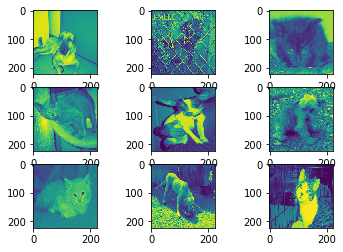

In [2]:
from matplotlib import pyplot

from sklearn.model_selection import train_test_split

def flatten_X(X):
    return np.vstack([arr.flatten() for arr in X])

def rgb2gray(rgb):
    # this converts the RGB colors to gray, so you have only one value per pixel
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]) 

def transform_to_gray_features(X):
    gray_features = []
    for instance in X:
        X_gray = rgb2gray(instance)
        flattened_X_gray = X_gray.flatten()
        gray_features.append(flattened_X_gray)
    return np.vstack(gray_features)

def get_train_val_test(X, y, split=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
    return X_train, y_train, X_test, y_test, X_val, y_val

X_train, y_train, X_test, y_test, X_val, y_val = get_train_val_test(X, y, split=0.2)

X_train_gray = transform_to_gray_features(X_train)
X_test_gray = transform_to_gray_features(X_test)
X_val_gray = transform_to_gray_features(X_val)



# plot first few images with the gray transform
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    
    # plot raw pixel data
    pyplot.imshow(rgb2gray(X_train[i]))
# show the figure
pyplot.show()

In [3]:
#Values in X
len(X)

600

In [4]:
X[0]

array([[[ 23.,  31.,  44.],
        [ 17.,  26.,  41.],
        [ 24.,  37.,  56.],
        ...,
        [167., 192., 233.],
        [162., 190., 230.],
        [166., 193., 236.]],

       [[ 22.,  30.,  43.],
        [ 13.,  22.,  37.],
        [ 23.,  36.,  55.],
        ...,
        [169., 194., 235.],
        [167., 192., 233.],
        [164., 192., 232.]],

       [[ 21.,  29.,  42.],
        [  8.,  17.,  32.],
        [ 21.,  34.,  53.],
        ...,
        [155., 180., 221.],
        [166., 191., 232.],
        [167., 192., 233.]],

       ...,

       [[ 32.,  35.,  68.],
        [ 30.,  35.,  65.],
        [ 33.,  40.,  66.],
        ...,
        [ 45.,  61.,  87.],
        [ 43.,  59.,  85.],
        [ 43.,  59.,  85.]],

       [[ 27.,  40.,  56.],
        [ 25.,  38.,  54.],
        [ 28.,  40.,  52.],
        ...,
        [ 34.,  52.,  76.],
        [ 35.,  55.,  80.],
        [ 37.,  57.,  82.]],

       [[ 19.,  32.,  48.],
        [ 17.,  30.,  46.],
        [ 20.,  

In [5]:
#Values in Y
len(y)

600

# Exercise 1: Train a model using the gray scaled features
For this exercise, you will import any model that you have worked with before, either from scikit-learn or any other library, and you will train it on the training set. You can test different hyperparameters using the validation set.

In [6]:
#Import linear regression from sklearn
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn import linear_model
import timeit

In [7]:
iters = 1000
reg = linear_model.LogisticRegression(multi_class = "multinomial", solver = "lbfgs", max_iter = iters)
print("Training Time:", timeit.timeit())

Training Time: 0.008221334999999996


In [8]:
reg.fit(X_train_gray, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
prediction_1 = reg.predict(X_val_gray)

Now, use the classification report function from sklearn to show evaluate the results.

In [10]:
from sklearn.metrics import classification_report
accuracy = reg.score(X_val_gray, y_val)
print('Accuracy: ', accuracy)
print('Prediction is 55% accurate in detrmining cats and dogs. ',)

Accuracy:  0.55
Prediction is 55% accurate in detrmining cats and dogs. 


In [11]:
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_val, prediction_1)

array([[14, 13],
       [14, 19]])

In [12]:
print(classification_report(y_val, prediction_1))

              precision    recall  f1-score   support

         cat       0.50      0.52      0.51        27
         dog       0.59      0.58      0.58        33

    accuracy                           0.55        60
   macro avg       0.55      0.55      0.55        60
weighted avg       0.55      0.55      0.55        60



In [13]:
#Confusion Matrix Outcome
#TP = 19
#FP = 13
#TN = 14
#FN = 14
#Since 0 is cats and 1 is dogs, from confusion matrix we can depict:
#True Positives (19 as cats)
#False Positives (13 are dogs when its cats) type 1 error 
#False Negatives (14 are cats when its dogs) type 2 error #FN 
#True Negatives (14 are dogs)

# Using Pre-trained models to extract features

In the cell below, we import the VGG16 model. We also have commented out the commands to use other existing pre-trained models from Keras.

In [14]:
from keras.applications.vgg16 import VGG16
# from keras.applications import ResNet50
# from keras.applications import InceptionV3
# from keras.applications import Xception # TensorFlow ONLY
# from keras.applications import VGG16
# from keras.applications import VGG19


model = VGG16(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

We run code to extract the features using the pre-trained model. Because we pass the flag include_top=False when loading the model, we get the vector of the last layer of the model before going through the Softmax function, instead of the model predictions. This vector should contain information about what is in the image.

In [15]:
def extract_features_from_images(images):
    # Receives an array of images and transform it into an array of features from DL models
    features = []
    
    for img in images:
        img_proper_shape = np.expand_dims(img, axis=0) # adds another axis required by DL models 
        extracted_features = model.predict(img_proper_shape)
        flattened_features = extracted_features.flatten() # We make a single 1D array to represent the features
        features.append(flattened_features)
        
    return np.vstack(features)

In [16]:
X_train_features = extract_features_from_images(X_train)

In [17]:
X_test_features = extract_features_from_images(X_test)
X_val_features = extract_features_from_images(X_val)

# Exercise 2: Using the features extracted from pre-trained models

Now, use the same model you have used for exercise 1, but now train it on X_train_features, the features extracted using the Deep Learning models. You can test different hyperparameters using the validation set.

In [18]:
#Import library dependencies
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [19]:
# Add code to train a model on the features extracted using the Deep Learning model
#Can use random forest, decision tree
clf = DecisionTreeClassifier()
clf.fit(X_train_features, y_train)
y_pred = clf.predict(X_val_features)

Print the classification report results on the test set below.

In [20]:
# Print the results from the classification report
confusion_matrix(y_val, y_pred)
accuracy_score(y_val, y_pred)*100

78.33333333333333

In [21]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         cat       0.79      0.70      0.75        27
         dog       0.78      0.85      0.81        33

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



# Bonus: Comparing different DL models

For Bonus points, try using different DL models to extract features. You can achieve that by changing the model = VGG16(weights='imagenet', include_top=False,input_shape=(224, 224, 3)) line of the code to use one of the other models from keras. ie. model = ResNet50(weights='imagenet', include_top=False,input_shape=(224, 224, 3)). Don't forget you need to import the models by removing the comments in that cell. Compare at least 3 models and report the results.

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from sklearn.linear_model import SGDClassifier
from keras import optimizers
from keras import layers
from sklearn import metrics

In [23]:
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.models import Model
import keras

In [24]:
                         ########## Creating Model Using VGG19 ##########

In [25]:
model = VGG19(include_top = False, weights = 'imagenet', input_shape = (224, 224, 3))

In [26]:
output = model.layers[1].output
output = keras.layers.Flatten()(output)

model = Model(model.input, output = output)

for layer in model.layers:
    layer.trainable = False
    
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3211264)           0         
Total params: 1,792
Trainable params: 0
Non-trainable params: 1,792
_________________________________________________________________


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(Tensor("in..., outputs=Tensor("fl...)`
  after removing the cwd from sys.path.


In [27]:
model_ = Sequential()
model_.add(model)
model_.add(Dense(512, activation = 'relu', input_shape = (224, 224, 3)))
model_.add(Dropout(0.3))
model_.add(Dense(512, activation = 'relu'))
model_.add(Dropout(0.3))
model_.add(Dense(1, activation = 'sigmoid'))

model_.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.SGD(lr = 2e-5),
             metrics = ['accuracy'])
model_.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 3211264)           1792      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1644167680
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 1,644,432,641
Trainable params: 1,644,430,849
Non-trainable params: 1,792
________________________________

In [28]:
########## Creating model using transfer learning using pre-trained RestNet50 ########## 
#adding my own connected layer and using sigmoid activation function.

In [29]:
model1 = ResNet50(include_top = False, weights = 'imagenet', input_shape = (224, 224, 3))

/opt/anaconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [30]:
output = model1.layers[1].output
output = keras.layers.Flatten()(output)
model1 = Model(model1.input, output = output)

for layer in model1.layers:
    layer.trainable = False
    
model1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 230, 230, 3)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 158700)            0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(Tensor("in..., outputs=Tensor("fl...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
model_1 = Sequential()
model_1.add(model1)
model_1.add(Dense(512, activation = 'relu', input_shape = (224, 224, 3)))
model_1.add(Dropout(0.3))
model_1.add(Dense(512, activation = 'relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(1, activation = 'sigmoid'))

model_1.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr = 2e-5),
             metrics = ['accuracy'])
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Model)              (None, 158700)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               81254912  
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 81,518,081
Trainable params: 81,518,081
Non-trainable params: 0
__________________________________________

In [32]:
                     ########## Creating Model Using InceptionV3 ##########

In [33]:
model3 = InceptionV3(include_top = False, weights = 'imagenet', input_shape = (224, 224, 3))

In [34]:
output = model3.layers[1].output
output = keras.layers.Flatten()(output)

model3 = Model(model3.input, output = output)

for layer in model3.layers:
    layer.trainable = False
    
model3.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 111, 111, 32)      864       
_________________________________________________________________
flatten_3 (Flatten)          (None, 394272)            0         
Total params: 864
Trainable params: 0
Non-trainable params: 864
_________________________________________________________________


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(Tensor("in..., outputs=Tensor("fl...)`
  after removing the cwd from sys.path.


In [35]:
model_3 = Sequential()
model_3.add(model3)
model_3.add(Dense(512, activation = 'relu', input_shape = (224, 224, 3)))
model_3.add(Dropout(0.3))
model_3.add(Dense(512, activation = 'relu'))
model_3.add(Dropout(0.3))
model_3.add(Dense(1, activation = 'sigmoid'))

model_3.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.Adagrad(lr = 0.0001),
             metrics = ['accuracy'])
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_3 (Model)              (None, 394272)            864       
_________________________________________________________________
dense_7 (Dense)              (None, 512)               201867776 
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 202,131,809
Trainable params: 202,130,945
Non-trainable params: 864
______________________________________

# Training a model for Sentiment Analysis

For the second part of this homework, we will be training a Natural Language Processing model to make predictions on two datasets: Tweets and Reddit comments. We will be using the data downloaded from Canvas. The cell below loads the data and splits it into train, validation and test.

In [85]:
import pandas as pd

twitter_df = pd.read_csv('Twitter_Data.csv').dropna()
reddit_df = pd.read_csv('Reddit_Data.csv').dropna()

X_twitter = twitter_df['clean_text']
y_twitter = twitter_df['category'] + 1 # We sum 1 so the categories are not negative. Now Negative is 0, Neutral is 1 and Positive is 2

X_reddit = reddit_df['clean_comment']
y_reddit = reddit_df['category'] + 1

In [37]:
                            ########## TWITTER SENTIMENT ##########

In [38]:
#twitter_df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [39]:
#Import library to tokinize data
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Embedding, Dropout

In [40]:
#tokenizer = Tokenizer(num_words = 5000, split = " ")
#tokenizer.fit_on_texts(twitter_df['clean_text'].values)

#X_twitter = tokenizer.texts_to_sequences(twitter_df['clean_text'].values)
#X_twitter = pad_sequences(X_twitter)

In [41]:
#X_twitter

array([[   0,    0,    0, ..., 4179,    3, 2806],
       [   0,    0,    0, ...,   38,    4,    1],
       [   0,    0,    0, ...,   50,   41, 3990],
       ...,
       [   0,    0,    0, ...,  118,  191,  397],
       [   0,    0,    0, ...,    6,  366,  599],
       [   0,    0,    0, ...,   11,  176,    4]], dtype=int32)

In [42]:
#X_twitter.shape

(162969, 49)

In [43]:
#y_twitter.shape

(162969,)

In [44]:
#model_twitter = Sequential()
#model_twitter.add(Embedding(5000, 49, input_length = X_twitter.shape[1]))
#model_twitter.add(Dropout(0.3))
#model_twitter.add(LSTM(256, return_sequences = True, dropout = 0.3, recurrent_dropout = 0.2))
#model_twitter.add(LSTM(256, dropout = 0.3, recurrent_dropout = 0.2))
#model_twitter.add(Dense(3, activation = 'softmax'))

In [45]:
#y_twitter = twitter_df['category']
#y_twitter

0        -1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
162975   -1.0
162976   -1.0
162977    0.0
162978    0.0
162979    1.0
Name: category, Length: 162969, dtype: float64

In [46]:
#X_train_tweet, y_train_tweet, X_test_tweet, y_test_tweet, X_val_tweet, y_val_tweet = get_train_val_test(X_twitter, y_twitter, split=0.2)

In [47]:
#iters = 10000
#log_reg_twitt = LogisticRegression(max_iter = iters, solver = 'lbfgs', multi_class = 'multinomial')

In [48]:
#log_reg_twitt.fit(X_train_tweet, y_train_tweet)
#print("Training Time:", timeit.timeit())

Training Time: 0.007561638999959541


In [49]:
#y_twitt_pred = log_reg_twitt.predict(X_test_tweet)

In [50]:
#accuracy = log_reg_twitt.score(X_val_tweet, y_val_tweet)
#print('Accuracy: ', accuracy)

Accuracy:  0.5162299809780941


In [51]:
#Confusion Matrix
#confusion_matrix(y_val_tweet, y_twitt_pred)

array([[   0, 1556, 2006],
       [   2, 2468, 3070],
       [   1, 3249, 3945]])

In [52]:
#print(classification_report(y_val_tweet, y_twitt_pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      3562
         0.0       0.34      0.45      0.39      5540
         1.0       0.44      0.55      0.49      7195

    accuracy                           0.39     16297
   macro avg       0.26      0.33      0.29     16297
weighted avg       0.31      0.39      0.35     16297



In [53]:
                ########## REDDIT SENTIMENT ##########

In [54]:
#tokenizer_reddit = Tokenizer(num_words = 1000, split = " ")
#tokenizer_reddit.fit_on_texts(reddit_df['clean_comment'].values)

#X_reddit = tokenizer_reddit.texts_to_sequences(reddit_df['clean_comment'].values)
#X_reddit = pad_sequences(X_reddit)

In [55]:
#X_reddit

array([[  0,   0,   0, ...,  18,   1, 111],
       [  0,   0,   0, ...,  61,  70,  21],
       [  0,   0,   0, ...,  54,  36, 535],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0, 420],
       [  0,   0,   0, ...,  37, 422, 818]], dtype=int32)

In [56]:
#X_reddit.shape

(37149, 957)

In [57]:
#y_reddit.shape

(37149,)

In [58]:
#model_reddit = Sequential()
#model_reddit.add(Embedding(1000, 957, input_length = X_reddit.shape[1]))
#model_reddit.add(Dropout(0.3))
#model_reddit.add(LSTM(256, return_sequences = True, dropout = 0.3, recurrent_dropout = 0.2))
#model_reddit.add(LSTM(256, dropout = 0.3, recurrent_dropout = 0.2))
#model_reddit.add(Dense(3, activation = 'softmax'))

In [59]:
#y_reddit = reddit_df['category']
#y_reddit

0        1
1        1
2       -1
3        0
4        1
        ..
37244    0
37245    1
37246    0
37247    1
37248    0
Name: category, Length: 37149, dtype: int64

In [60]:
#X_train_reddit, y_train_reddit, X_test_reddit, y_test_reddit, X_val_reddit, y_val_reddit = get_train_val_test(X_reddit, y_reddit, split=0.2)

In [61]:
#iters = 10000
#log_reg_reddit = LogisticRegression(max_iter = iters, solver = 'lbfgs', multi_class = 'multinomial')

In [62]:
#log_reg_reddit.fit(X_train_reddit, y_train_reddit)
#print("Training Time:", timeit.timeit())

Training Time: 0.009001799999964533


In [63]:
#y_reddit_pred = log_reg_reddit.predict(X_test_reddit)

In [64]:
#accuracy = log_reg_reddit.score(X_val_reddit, y_val_reddit)
#print('Accuracy: ', accuracy)

Accuracy:  0.5682368775235531


In [65]:
#Confusion Matrix
#confusion_matrix(y_val_reddit, y_reddit_pred)

array([[  6, 411, 389],
       [  6, 662, 653],
       [  9, 806, 773]])

In [66]:
#print(classification_report(y_val_reddit, y_reddit_pred))

              precision    recall  f1-score   support

          -1       0.29      0.01      0.01       806
           0       0.35      0.50      0.41      1321
           1       0.43      0.49      0.45      1588

    accuracy                           0.39      3715
   macro avg       0.35      0.33      0.29      3715
weighted avg       0.37      0.39      0.34      3715



# Exercise 3: Using count-based methods to represent text documents.

Using what was you learned in class, train two models per dataset. The first one will be using CountVectorizer and the second one will be using the TF-IDF Vectorizer. You can use any model you want, but you should report the results using both feature vectors.
Report the values for the two models trained on Twitter and the two models trained on Reddit.

In [86]:
#Import dependencies
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas import DataFrame
import numpy as np
import time

In [87]:
def get_train_val_test(X, y, split=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
    return X_train, y_train, X_test, y_test, X_val, y_val

In [88]:
X_train_tweet, y_train_tweet, X_test_tweet, y_test_tweet, X_val_tweet, y_val_tweet = get_train_val_test(X_twitter, y_twitter, split=0.2)

In [89]:
X_train_reddit, y_train_reddit, X_test_reddit, y_test_reddit, X_val_reddit, y_val_reddit = get_train_val_test(X_reddit, y_reddit, split=0.2)

In [90]:
### Viewing the shapes of X_train_tweet, X_test_tweet and X_val_tweet ###
print(X_train_tweet.shape)
print(X_test_tweet.shape)
print(X_val_tweet.shape)

(130375,)
(16297,)
(16297,)


In [91]:
### Viewing the shapes of X_train_reddit, X_test_reddit and X_val_reddit ###
print(X_train_reddit.shape)
print(X_test_reddit.shape)
print(X_val_reddit.shape)

(29719,)
(3715,)
(3715,)


In [92]:
                                ##### Twitter Count Vectorizer #####

In [93]:
twitt_count_vect = CountVectorizer()
twitt_count_vect.fit_transform(X_train_tweet)

<130375x92878 sparse matrix of type '<class 'numpy.int64'>'
	with 2378719 stored elements in Compressed Sparse Row format>

In [94]:
### Transformation of all X datasets ###

X_train_tweet_count_vect = twitt_count_vect.transform(X_train_tweet)
X_test_tweet_count_vect = twitt_count_vect.transform(X_test_tweet)
X_val_tweet_count_vect = twitt_count_vect.transform(X_val_tweet)

In [95]:
### Looking at the current shape of the transformed X datasets ###
print(X_train_tweet_count_vect.shape)
print(X_test_tweet_count_vect.shape)
print(X_val_tweet_count_vect.shape)

(130375, 92878)
(16297, 92878)
(16297, 92878)


In [96]:
### Counter Vectorization for Twitter Data
### Logistic regression - Classification

start_time = time.process_time()

twitter_log_reg = LogisticRegression(max_iter = 1000, penalty='l2', solver='lbfgs', multi_class = "auto")
twitter_log_reg.fit(X_train_tweet_count_vect, y_train_tweet)
print("Time to train:", time.process_time() - start_time)

inference_start = time.process_time()

y_prediction = twitter_log_reg.predict(X_val_tweet_count_vect)

print("Inference time:",time.process_time() - inference_start)
print("Accuracy score:", twitter_log_reg.score(X_val_tweet_count_vect, y_val_tweet))
print(classification_report(y_val_tweet, y_prediction))

Time to train: 320.6666479999999
Inference time: 0.038681999999880645
Accuracy score: 0.9425661164631527
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      3562
         1.0       0.95      0.98      0.96      5540
         2.0       0.95      0.94      0.95      7195

    accuracy                           0.94     16297
   macro avg       0.94      0.94      0.94     16297
weighted avg       0.94      0.94      0.94     16297



In [97]:
                                ##### Twitter TFIDF Vectorizer #####

In [98]:
#Initializing the vectorizer with n-grams (1,3 = unigrams and utilizing a 3-word combo)

twitt_tfid_vect = TfidfVectorizer(ngram_range = (1,3))
twitt_tfid_vect.fit_transform(X_train_tweet)

<130375x2780452 sparse matrix of type '<class 'numpy.float64'>'
	with 7170411 stored elements in Compressed Sparse Row format>

In [99]:
### Transformations of X dataset ###
X_train_tweet_tfidf = twitt_tfid_vect.transform(X_train_tweet)
X_test_tweet_tfidf = twitt_tfid_vect.transform(X_test_tweet)
X_val_tweet_tfidf = twitt_tfid_vect.transform(X_val_tweet)

In [100]:
### Viewing shapes after X dataset transformations ###
print(X_train_tweet_tfidf.shape)
print(X_test_tweet_tfidf.shape)
print(X_val_tweet_tfidf.shape)

(130375, 2780452)
(16297, 2780452)
(16297, 2780452)


In [101]:
### TFIDF - Twitter Data ###
### Logistic regression - Classification ###

start_time = time.process_time()

twitter_tfidf_reg = LogisticRegression(max_iter = 1000, penalty='l2', solver='lbfgs', multi_class = "auto")
twitter_tfidf_reg.fit(X_train_tweet_tfidf, y_train_tweet)
print("Time to train:", time.process_time() - start_time)

inference_start = time.process_time()

twitt_tfidf_prediction = twitter_tfidf_reg.predict(X_val_tweet_tfidf)

print("Inference time:",time.process_time() - inference_start)
print("Accuracy score:", twitter_tfidf_reg.score(X_val_tweet_tfidf, y_val_tweet))
print(classification_report(y_val_tweet, twitt_tfidf_prediction))

Time to train: 1999.2731180000005
Inference time: 0.32789599999978236
Accuracy score: 0.8632263606798797
              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80      3562
         1.0       0.90      0.85      0.87      5540
         2.0       0.84      0.93      0.88      7195

    accuracy                           0.86     16297
   macro avg       0.87      0.84      0.85     16297
weighted avg       0.86      0.86      0.86     16297



In [106]:
                                ##### Reddit Count Vectorizer #####

In [107]:
reddit_count_vect = CountVectorizer()
reddit_count_vect.fit_transform(X_train_reddit)

<29719x46770 sparse matrix of type '<class 'numpy.int64'>'
	with 671093 stored elements in Compressed Sparse Row format>

In [108]:
### Transformation of all reddit X datasets ###

X_train_reddit_count_vect = reddit_count_vect.transform(X_train_reddit)
X_test_reddit_count_vect = reddit_count_vect.transform(X_test_reddit)
X_val_reddit_count_vect = reddit_count_vect.transform(X_val_reddit)

In [109]:
### Looking at the current shape of the transformed X datasets ###
print(X_train_reddit_count_vect.shape)
print(X_test_reddit_count_vect.shape)
print(X_val_reddit_count_vect.shape)

(29719, 46770)
(3715, 46770)
(3715, 46770)


In [110]:
### Counter Vectorization for Reddit Data
### Logistic regression - Classification

start_time = time.process_time()

reddit_log_reg = LogisticRegression(max_iter = 1000, penalty='l2', solver='lbfgs', multi_class = "auto")
reddit_log_reg.fit(X_train_reddit_count_vect, y_train_reddit)
print("Time to train:", time.process_time() - start_time)

inference_start = time.process_time()

y_prediction_reddit = reddit_log_reg.predict(X_val_reddit_count_vect)

print("Inference time:",time.process_time() - inference_start)
print("Accuracy score:", reddit_log_reg.score(X_val_reddit_count_vect, y_val_reddit))
print(classification_report(y_val_reddit, y_prediction_reddit))

Time to train: 72.46569600000021
Inference time: 0.015021999999589752
Accuracy score: 0.9009421265141319
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       806
           1       0.91      0.97      0.94      1321
           2       0.92      0.90      0.91      1588

    accuracy                           0.90      3715
   macro avg       0.89      0.89      0.89      3715
weighted avg       0.90      0.90      0.90      3715



In [111]:
                            ##### Reddit TFIDF Vectorizer #####

In [112]:
#Initializing the vectorizer with n-grams (1,3 = unigrams and utilizing a 3-word combo)

reddit_tfid_vect = TfidfVectorizer(ngram_range = (1,3))
reddit_tfid_vect.fit_transform(X_train_reddit)

<29719x1183157 sparse matrix of type '<class 'numpy.float64'>'
	with 2238483 stored elements in Compressed Sparse Row format>

In [113]:
### Transformations of X Reddit dataset ###
X_train_reddit_tfidf = reddit_tfid_vect.transform(X_train_reddit)
X_test_reddit_tfidf = reddit_tfid_vect.transform(X_test_reddit)
X_val_reddit_tfidf = reddit_tfid_vect.transform(X_val_reddit)

In [114]:
### Viewing shapes after X dataset transformations on Reddit ###
print(X_train_reddit_tfidf.shape)
print(X_test_reddit_tfidf.shape)
print(X_val_reddit_tfidf.shape)

(29719, 1183157)
(3715, 1183157)
(3715, 1183157)


In [115]:
### TFIDF - Reddit Data ###
### Logistic regression - Classification ###

start_time = time.process_time()

reddit_tfidf_reg = LogisticRegression(max_iter = 1000, penalty='l2', solver='lbfgs', multi_class = "auto")
reddit_tfidf_reg.fit(X_train_reddit_tfidf, y_train_reddit)
print("Time to train:", time.process_time() - start_time)

inference_start = time.process_time()

reddit_tfidf_prediction = reddit_tfidf_reg.predict(X_val_reddit_tfidf)

print("Inference time:",time.process_time() - inference_start)
print("Accuracy score:", reddit_tfidf_reg.score(X_val_reddit_tfidf, y_val_reddit))
print(classification_report(y_val_reddit, reddit_tfidf_prediction))

Time to train: 387.5645880000002
Inference time: 0.12285800000063318
Accuracy score: 0.7698519515477793
              precision    recall  f1-score   support

           0       0.88      0.55      0.68       806
           1       0.88      0.70      0.78      1321
           2       0.69      0.93      0.79      1588

    accuracy                           0.77      3715
   macro avg       0.82      0.73      0.75      3715
weighted avg       0.80      0.77      0.76      3715



# Deep Learning and Word Embeddings

We will now use an LSTM to make predictions on the data. We will first compute the Vocabulary size for the two datasets.

In [116]:
twitter_vocabulary_size = len(set([tok for s in X_train_tweet.values.tolist() for tok in s.split()]))
reddit_vocabulary_size = len(set([tok for s in X_train_reddit.values.tolist() for tok in s.split()]))

print(f"Twitter' Vocabulary size is {twitter_vocabulary_size} and Reddit's Vocabulary size is {reddit_vocabulary_size}")

Twitter' Vocabulary size is 97988 and Reddit's Vocabulary size is 48143


Now we preprocess the data. To use it on Keras, we first need to change the words to numeric values. We also need to make all the sentences to be the same size for the matrix computations. To do that, we select a length to the text.
If the text is shorter than the length, we pad it with zeros until it is has the correct size. The model will learn that zeros mean padding and will ignore it.
If the text is longer than the length, we just discard the extra words.

In [117]:
from keras.preprocessing.text import one_hot
from keras.preprocessing import sequence

OOV_BUCKETS = 10
TEXT_LENGTH = 100
# Creates sequences for twitter_data
def converts_text_to_padded_sequences(X, vocabulary_size, oov=OOV_BUCKETS, max_review_length=TEXT_LENGTH):
    number_sequences =  [one_hot(sentence, vocabulary_size + oov ) for sentence in X.values.tolist()]
    padded_sequences = sequence.pad_sequences(number_sequences, maxlen=max_review_length)

    return padded_sequences

twitter_train_dl = converts_text_to_padded_sequences(X_train_tweet, twitter_vocabulary_size)
twitter_test_dl = converts_text_to_padded_sequences(X_test_tweet, twitter_vocabulary_size)
twitter_val_dl = converts_text_to_padded_sequences(X_val_tweet, twitter_vocabulary_size)


reddit_train_dl = converts_text_to_padded_sequences(X_train_reddit, reddit_vocabulary_size)
reddit_test_dl = converts_text_to_padded_sequences(X_test_reddit, reddit_vocabulary_size)
reddit_val_dl = converts_text_to_padded_sequences(X_val_reddit, reddit_vocabulary_size)

Now that we have all the train, validation and test splits for the two datasets, we will start by training a sentiment analysis model on Reddit data. The code below will train a one layer LSTM on the Reddit data. It will create n embeddings, being n the vocabulary size. It means that each word will have their own embedding and the model will learnr how to represent the words as it learns to perfom the task.

In [118]:
import matplotlib.pyplot as plt

def plot_history(history):
    pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
    plt.grid(True)
    plt.show()

In [119]:
import numpy
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest



my_callbacks = [
    keras.callbacks.EarlyStopping(patience=2),
    keras.callbacks.ModelCheckpoint(filepath="best_weights_reddit.hdf5", verbose=1, save_best_only=True),
]


def train_model(X_train, y_train, X_val, y_val, embedding_size, vocabulary_size, text_length, epochs, batch_size):
    model = Sequential()
    model.add(Embedding(vocabulary_size, embedding_size, input_length=text_length)) # We create embeddings for each word in our vocabulary
    model.add(LSTM(100)) # one layer of LSTM with 100 hidden units
    model.add(Dense(3, activation='softmax')) # Output softmax for the 3 classes, Negative, Neutral and Positive
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=my_callbacks)
    
    return model, history
  
# We train a model by passing the reddit data and parrameters related to reddit.
start_training = time.process_time()

reddit_model, reddit_history = train_model(reddit_train_dl, y_train_reddit, reddit_val_dl, y_val_reddit, 
                             embedding_size=32, vocabulary_size=reddit_vocabulary_size+OOV_BUCKETS, 
                             text_length= TEXT_LENGTH, epochs=20, batch_size=64)


reddit_model.load_weights('best_weights_reddit.hdf5')

print("training time:",time.process_time() - start_training)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 32)           1540896   
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 303       
Total params: 1,594,399
Trainable params: 1,594,399
Non-trainable params: 0
_________________________________________________________________
None


/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 29719 samples, validate on 3715 samples
Epoch 1/20
29719/29719 [==============================] - 163s 5ms/step - loss: 0.6689 - accuracy: 0.7146 - val_loss: 0.4012 - val_accuracy: 0.8546

Epoch 00001: val_loss improved from inf to 0.40117, saving model to best_weights_reddit.hdf5
Epoch 2/20
29719/29719 [==============================] - 157s 5ms/step - loss: 0.3051 - accuracy: 0.8981 - val_loss: 0.3648 - val_accuracy: 0.8818

Epoch 00002: val_loss improved from 0.40117 to 0.36475, saving model to best_weights_reddit.hdf5
Epoch 3/20
29719/29719 [==============================] - 157s 5ms/step - loss: 0.1625 - accuracy: 0.9491 - val_loss: 0.3716 - val_accuracy: 0.8832

Epoch 00003: val_loss did not improve from 0.36475
Epoch 4/20
29719/29719 [==============================] - 158s 5ms/step - loss: 0.1094 - accuracy: 0.9684 - val_loss: 0.4130 - val_accuracy: 0.8764

Epoch 00004: val_loss did not improve from 0.36475
training time: 4906.761879999999


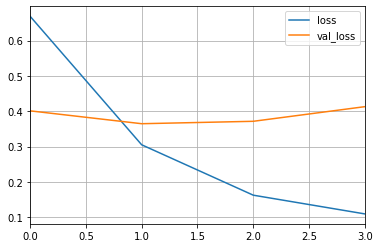

In [120]:
plot_history(reddit_history)

# Exercise 4: Train a sentiment analysis model on Twitter data

Now you will change the previous code to train a model on the Twitter data. You will tune the parameters using the Validation set results.

In [121]:
import time

In [122]:
import numpy
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest

start = time.process_time()

my_callbacks = [
    keras.callbacks.EarlyStopping(patience=2),
    keras.callbacks.ModelCheckpoint(filepath="best_weights_twitter.hdf5", verbose=1, save_best_only=True),
]


def train_model(X_train, y_train, X_val, y_val, embedding_size, vocabulary_size, text_length, epochs, batch_size):
    model = Sequential()
    model.add(Embedding(vocabulary_size, embedding_size, input_length=text_length)) # We create embeddings for each word in our vocabulary
    model.add(LSTM(100)) # one layer of LSTM with 100 hidden units
    model.add(Dense(3, activation='softmax')) # Output softmax for the 3 classes, Negative, Neutral and Positive
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=my_callbacks)
    
    return model, history
  
# We train a model by passing the reddit data and parrameters related to reddit.
start_training = time.process_time()

twitter_model, twitter_history = train_model(twitter_train_dl, y_train_tweet, twitter_val_dl, y_val_tweet, 
                             embedding_size=32, vocabulary_size=twitter_vocabulary_size+OOV_BUCKETS, 
                             text_length= TEXT_LENGTH, epochs=20, batch_size=64)



twitter_model.load_weights('best_weights_twitter.hdf5')

print("training time:",time.process_time() - start_training)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 32)           3135936   
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 303       
Total params: 3,189,439
Trainable params: 3,189,439
Non-trainable params: 0
_________________________________________________________________
None


/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 130375 samples, validate on 16297 samples
Epoch 1/20
130375/130375 [==============================] - 734s 6ms/step - loss: 0.3282 - accuracy: 0.8818 - val_loss: 0.1908 - val_accuracy: 0.9418

Epoch 00001: val_loss improved from inf to 0.19083, saving model to best_weights_twitter.hdf5
Epoch 2/20
130375/130375 [==============================] - 731s 6ms/step - loss: 0.1393 - accuracy: 0.9578 - val_loss: 0.1510 - val_accuracy: 0.9510

Epoch 00002: val_loss improved from 0.19083 to 0.15105, saving model to best_weights_twitter.hdf5
Epoch 3/20
130375/130375 [==============================] - 732s 6ms/step - loss: 0.0899 - accuracy: 0.9714 - val_loss: 0.1462 - val_accuracy: 0.9527

Epoch 00003: val_loss improved from 0.15105 to 0.14623, saving model to best_weights_twitter.hdf5
Epoch 4/20
130375/130375 [==============================] - 733s 6ms/step - loss: 0.0609 - accuracy: 0.9808 - val_loss: 0.1650 - val_accuracy: 0.9476

Epoch 00004: val_loss did not improve from 0.14623
Epoc

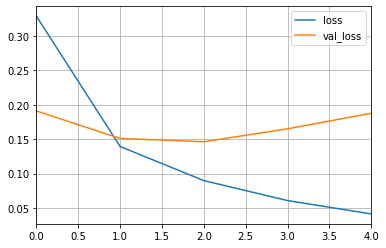

In [123]:
plot_history(twitter_history)

# Exercise 5: Compare the models

For this last exercise, you will compare all your models. You will make predictions on Twitter using your CountVectorizer, TFIDFVectorizer, and LSTM models and report the results using the classification report. You will do the same for the Reddit data.

In [ ]:
                                ##### REDDIT LSTM PREDICTIONS #####

In [127]:
start_inference = time.process_time()
reddit_lstm = reddit_model.predict(reddit_val_dl, verbose = 1)
print("Inference time:",time.process_time() - start_inference)
print(reddit_lstm)

3715/3715 [==============================] - 7s 2ms/step
Inference time: 48.699666000000434
[[4.5568019e-02 9.0474440e-03 9.4538456e-01]
 [9.9382049e-01 4.0858407e-03 2.0936248e-03]
 [6.3184318e-03 9.9033022e-01 3.3513920e-03]
 ...
 [2.9061943e-01 5.2059376e-01 1.8878679e-01]
 [2.5621543e-02 5.9088644e-02 9.1528982e-01]
 [9.9598664e-01 6.9276069e-04 3.3205010e-03]]


In [132]:
start_inference = time.process_time()
prediction_reddit_lstm = reddit_model.predict_classes(reddit_val_dl, verbose = 1)
print("inference time:",time.process_time() - start_inference)
print(prediction_reddit_lstm)

3715/3715 [==============================] - 7s 2ms/step
inference time: 48.79968799999915
[2 0 1 ... 1 2 0]


In [133]:
print("Classification Report:  Reddit/LSTM:")
print(classification_report(y_val_reddit, prediction_reddit_lstm))

Classification Report:  Reddit/LSTM:
              precision    recall  f1-score   support

           0       0.84      0.70      0.77       806
           1       0.95      0.93      0.94      1321
           2       0.84      0.93      0.89      1588

    accuracy                           0.88      3715
   macro avg       0.88      0.86      0.86      3715
weighted avg       0.88      0.88      0.88      3715



In [ ]:
                            ##### TWITTER LSTM PREDICTIONS #####

In [134]:
start_inference = time.process_time()
prediction_twitter_lstm = twitter_model.predict_classes(twitter_val_dl, verbose = 1)
print("inference time:",time.process_time() - start_inference)
print(prediction_twitter_lstm)

16297/16297 [==============================] - 34s 2ms/step
inference time: 223.80338800000027
[2 2 0 ... 0 2 2]


In [136]:
print("Classification Report:  Twitter/LSTM:")
print(classification_report(y_val_tweet, prediction_twitter_lstm))

Classification Report:  Twitter/LSTM:
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      3562
         1.0       0.98      0.95      0.97      5540
         2.0       0.95      0.96      0.96      7195

    accuracy                           0.95     16297
   macro avg       0.95      0.95      0.95     16297
weighted avg       0.95      0.95      0.95     16297



In [137]:
            ##### Predictions for the Twitter Counter Vectorizer using test data #####   

In [144]:
start_time = time.process_time()

twitter_log_reg_test = LogisticRegression(max_iter = 1000, penalty='l2', solver='lbfgs', multi_class = "auto")
twitter_log_reg_test.fit(X_train_tweet_count_vect, y_train_tweet)
print("Time to train:", time.process_time() - start_time)

inference_start = time.process_time()

y_prediction_twitter_test = twitter_log_reg_test.predict(X_test_tweet_count_vect)

print("Inference time:",time.process_time() - inference_start)
print("Classification Report - Final:  Twitter/Count Vectorizer")
print(classification_report(y_test_tweet, y_prediction_twitter_test))

Time to train: 315.8413600000058
Inference time: 0.15253999999549706
Classification Report - Final:  Twitter/Count Vectorizer
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90      3590
         1.0       0.96      0.98      0.97      5527
         2.0       0.95      0.95      0.95      7180

    accuracy                           0.95     16297
   macro avg       0.94      0.94      0.94     16297
weighted avg       0.95      0.95      0.95     16297



In [ ]:
                ##### Predictions for the Twitter TFIDF vectorizer using test data #####  

In [145]:
start_time = time.process_time()

twitter_tfidf_reg_test = LogisticRegression(max_iter = 1000, penalty='l2', solver='lbfgs', multi_class = "auto")
twitter_tfidf_reg_test.fit(X_train_tweet_tfidf, y_train_tweet)
print("Time to train:", time.process_time() - start_time)

inference_start = time.process_time()

twitt_tfidf_prediction_test = twitter_tfidf_reg_test.predict(X_test_tweet_tfidf)

print("Inference time:",time.process_time() - inference_start)
print("Classification Report - Final:  Twitter/TFIDF Vectorizer")
print(classification_report(y_test_tweet, twitt_tfidf_prediction_test))

Time to train: 1968.504657999998
Inference time: 0.47445000000152504
Classification Report - Final:  Twitter/TFIDF Vectorizer
              precision    recall  f1-score   support

         0.0       0.87      0.74      0.80      3590
         1.0       0.90      0.86      0.88      5527
         2.0       0.84      0.93      0.89      7180

    accuracy                           0.87     16297
   macro avg       0.87      0.84      0.85     16297
weighted avg       0.87      0.87      0.86     16297



In [ ]:
                ##### Predictions for the Reddit Counter Vectorizer using test data #####  

In [146]:
start_time = time.process_time()

reddit_log_reg_test = LogisticRegression(max_iter = 1000, penalty='l2', solver='lbfgs', multi_class = "auto")
reddit_log_reg_test.fit(X_train_reddit_count_vect, y_train_reddit)
print("Time to train:", time.process_time() - start_time)

inference_start = time.process_time()

y_prediction_reddit_test = reddit_log_reg_test.predict(X_test_reddit_count_vect)

print("Inference time:",time.process_time() - inference_start)
print("Classification Report - Final:  Reddit/Count Vectorizer")
print(classification_report(y_test_reddit, y_prediction_reddit_test))

Time to train: 71.74125600000116
Inference time: 0.07310000000143191
Classification Report - Final:  Reddit/Count Vectorizer
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       791
           1       0.90      0.98      0.94      1333
           2       0.92      0.91      0.91      1591

    accuracy                           0.90      3715
   macro avg       0.90      0.88      0.89      3715
weighted avg       0.90      0.90      0.90      3715



In [ ]:
                ##### Predictions for the Reddit TFIDF Vectorizer using test data ##### 

In [147]:
start_time = time.process_time()

reddit_tfidf_reg_test = LogisticRegression(max_iter = 1000, penalty='l2', solver='lbfgs', multi_class = "auto")
reddit_tfidf_reg_test.fit(X_train_reddit_tfidf, y_train_reddit)
print("Time to train:", time.process_time() - start_time)

inference_start = time.process_time()

reddit_tfidf_prediction_test = reddit_tfidf_reg_test.predict(X_test_reddit_tfidf)

print("Inference time:",time.process_time() - inference_start)
print("Classification Report - Final:  Reddit/TFIDF Vectorizer")
print(classification_report(y_test_reddit, reddit_tfidf_prediction_test))

Time to train: 388.29861399999936
Inference time: 0.18623200000001816
Classification Report - Final:  Reddit/TFIDF Vectorizer
              precision    recall  f1-score   support

           0       0.86      0.50      0.63       791
           1       0.87      0.72      0.79      1333
           2       0.69      0.94      0.80      1591

    accuracy                           0.77      3715
   macro avg       0.81      0.72      0.74      3715
weighted avg       0.79      0.77      0.76      3715



In [138]:
# Using Test Data for Reddit Dataset (Final)

start_inference = time.process_time()
pred_reddit_lstm_test = reddit_model.predict_classes(reddit_test_dl, verbose = 1)

print("Inference time:",time.process_time() - start_inference)

print("Classification Report:  Reddit/LSTM:")
print(classification_report(y_test_reddit, pred_reddit_lstm_test))

3715/3715 [==============================] - 7s 2ms/step
Inference time: 48.73641399999906
Classification Report:  Reddit/LSTM:
              precision    recall  f1-score   support

           0       0.85      0.68      0.75       791
           1       0.94      0.94      0.94      1333
           2       0.85      0.94      0.90      1591

    accuracy                           0.88      3715
   macro avg       0.88      0.85      0.86      3715
weighted avg       0.88      0.88      0.88      3715



In [139]:
# Using Test Data for Twitter Dataset (Final)
start_inference = time.process_time()
pred_twitter_lstm_test = twitter_model.predict_classes(twitter_test_dl, verbose = 1)

print("Inference time:",time.process_time() - start_inference)

print("Classification Report:  Twitter/LSTM:")
print(classification_report(y_test_tweet, pred_twitter_lstm_test))

16297/16297 [==============================] - 34s 2ms/step
Inference time: 222.76484000000346
Classification Report:  Twitter/LSTM:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      3590
         1.0       0.98      0.95      0.97      5527
         2.0       0.95      0.97      0.96      7180

    accuracy                           0.95     16297
   macro avg       0.95      0.95      0.95     16297
weighted avg       0.95      0.95      0.95     16297

